# Homework 5: Calculus and Linear Algebra in Python

** Submit this notebook to bCourses to receive a credit for this assignment.**

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook name_HW05.ipynb.

# Problem 1: Numerical Differentiation

In [1]:
def forward_dy(y, x):
    '''
        Uses forward differences (see below) to estimate the derivatives at each value of x, 
        except for the last one. The derivative at the last value of x is estimated 
        using a backward difference.
            dy/dx at x[i] is approximated by (y[i+1] - y[i]) /  (x[i+1] - x[i])
    '''
    dyf = [0.0]*len(x)
    for i in range(len(y)-1):
        dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
    
    #set last element by backwards difference
    dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dyf

def backward_dy(y, x):
    '''
        Uses backward differences (see below) to estimate the derivatives at each value of x, 
        except for the first one. The derivative at the first value of x is estimated 
        using a forward difference.
            dy/dx at x[i] is approximated by (y[i] - y[i-1]) /  (x[i] - x[i-1])
    '''
    
    dyb = [0.0]*len(x)
    #set first element by forward difference
    dyb[0] = (y[0] - y[1])/(x[0] - x[1])
    for i in range(1,len(y)):
        dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

    return dyb

def centered_dy(y, x):
    '''
        Uses centered differences (see below) to estimate the derivatives at each value of x, 
        except for the first and last values. The derivative at the first value of x is estimated 
        using a forward difference. The derivative at the last value of x is estimated 
        using a backward difference.
            dy/dx at x[i] is approximated by (y[i+1] - y[i-1]) / (x[i+1]-x[i-1])
    '''
    dyc = [0.0]*len(x)
    dyc[0] = (y[0] - y[1])/(x[0] - x[1])
    for i in range(1,len(y)-1):
        dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
    dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

    return dyc

1a) Use the functions above to estimate the $f'(x)$ in three ways for
$$f(x) = \cos(x)$$
using $N = 100$ points in the window $x\in [0, 2\pi)$. Calculate the analytical derivative at each point as well. Plot the four curves together (forward derivatives, backward derivatives, centered derivatives, and analytical derivatives). If you have done everything right, they should all agree well with each other. You do not need axis labels, but do add a legend to indicate which curve is which.

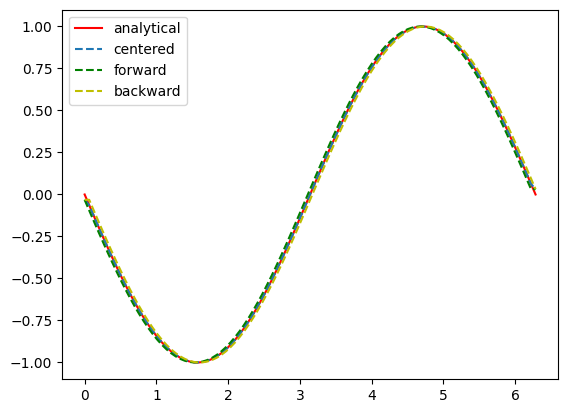

In [21]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.linspace(0,2*np.pi,n)
y = np.cos(x)
analytical = -np.sin(x)
forward = forward_dy(y,x)
backward = backward_dy(y,x)
centered = centered_dy(y,x)

plt.figure()
plt.plot(x,analytical,'r')
plt.plot(x,centered,'--')
plt.plot(x,forward,'g--')
plt.plot(x,backward,'y--')
plt.legend(['analytical','centered','forward','backward'])
plt.show()

1b) Plot the difference between result from each estimate method and the result from the analytical method. For example, you should compute `dyf - dy_analytical`,`dyb - dy_analytical`, and `dyc - dy_analytical` and plot all three together. You do not need axis labels, but do add a legend to indicate which curve is which. Which method is most accurate? 

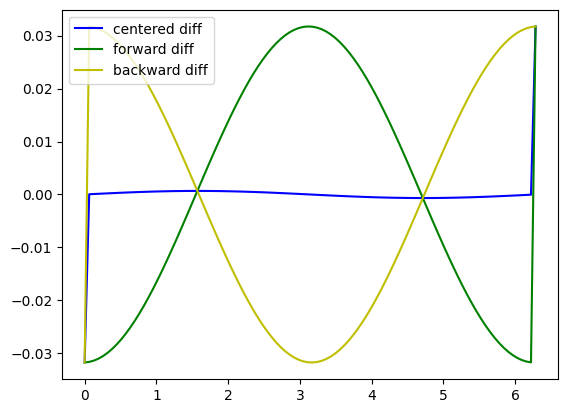

In [27]:
diff = [centered-analytical,forward-analytical,backward-analytical]

plt.figure()
plt.plot(x,diff[0],'b',label='centered diff')
plt.plot(x,diff[1],'g',label = 'forward diff')
plt.plot(x,diff[2],'y', label = 'backward diff')
plt.legend()
plt.show()

1c) Vary the number of points $N$ representing the original function (try $N = 10, 100, 1000$ points). How does the precision change (*Hint: look at the maximum/minimum value of the differences you calculated above*).

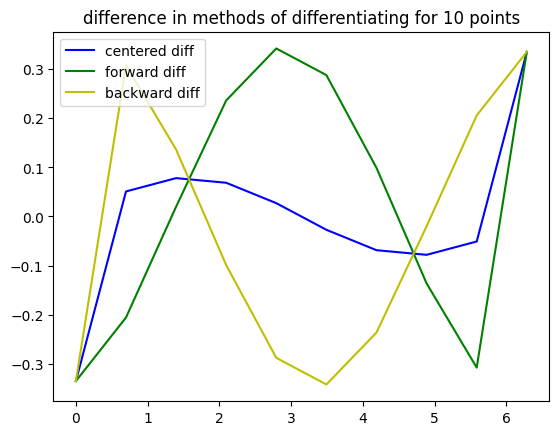

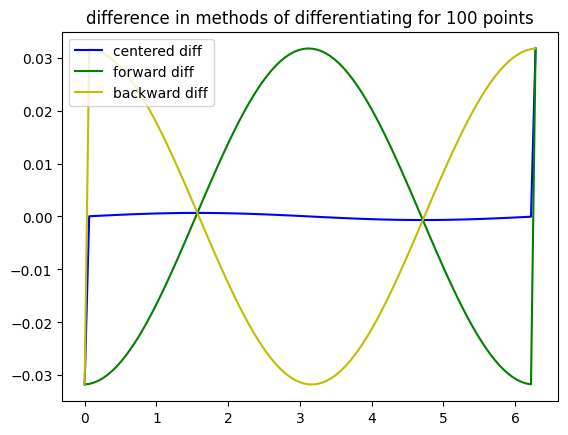

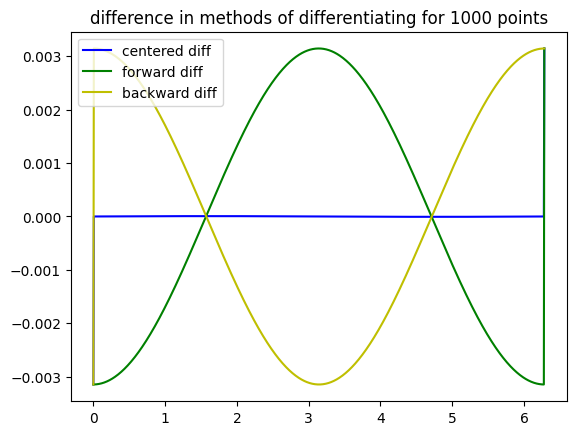

In [32]:
ns = [10,100,1000]
for n in ns:
    x = np.linspace(0,2*np.pi,n)
    y = np.cos(x)
    analytical = -np.sin(x)
    forward = forward_dy(y,x)
    backward = backward_dy(y,x)
    centered = centered_dy(y,x)

    diff = [centered-analytical,forward-analytical,backward-analytical]
    plt.figure()
    plt.plot(x,diff[0],'b',label='centered diff')
    plt.plot(x,diff[1],'g',label = 'forward diff')
    plt.plot(x,diff[2],'y', label = 'backward diff')
    plt.title(f'difference in methods of differentiating for {n} points')
    plt.legend()
    plt.show()

#as the number n increases, the amount of points increase, causing the differences to be smoother. at the end, at the end points
# they all have the same difference, but the variance lies in the smoothness of the graph. this is best observed
    

# Problem 2: Numerical Integration

Compare results of the trapezoid integration method,  Simpson’s method, and the adaptive Gaussian quadrature method for the following integrals:

1. $$\int_0^{\pi/2}\sin x\, dx $$
1. $$\int_2^7 \frac{1}{x^2}\, dx $$
1. $$\int_1^5 (3x^2+x-4)\, dx$$

For each part, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) In your submitted work, describe roughly how many points were required, and explain.

In [67]:
from scipy.integrate import trapezoid,simpson,quad
#for all equations i am assuming the quaderature method from scipy is basically the right answer
#1
def g1(x):
    return np.sin(x)
quadV,err = quad(g1,0,np.pi/2)
x = np.linspace(0,np.pi/2,100)
y = g1(x)
trapV = trapezoid(y,x)
simpsonV = simpson(y = y,x= x)
print('problem 1:')
print(f"Quad value: {quadV}   Qaud error: {err}"
       f"\ntrap value: {trapV}, error: {abs(quadV-trapV)}"
       f"\nsimps value: {simpsonV}, error: {abs(quadV-simpsonV)}")
#for this equation, the trapz and simps method are capable of getting accurate results even with the default 50 points, but I'd do 100 anyways

#2
def g1(x):
    return 1/np.square(x)
quadV,err = quad(g1,2,7)
x = np.linspace(2,7,100)
y = g1(x)
trapV = trapezoid(y,x)
simpsonV = simpson(y = y,x= x)
print("\n\nProblem 2:")
print(f"Quad value: {quadV}   Qaud error: {err}"
       f"\ntrap value: {trapV}, error: {abs(quadV-trapV)}"
       f"\nsimps value: {simpsonV}, error: {abs(quadV-simpsonV)}")
#same as previous equation, 50 slices, is efficient in getting an accurate result, however I'd do 100

#3
def g1(x):
    return 3*x**2+x-4
quadV,err = quad(g1,2,7)
x = np.linspace(2,7,1000)
y = g1(x)
trapV = trapezoid(y,x)
simpsonV = simpson(y = y,x= x)
print("\n\nProblem 3:")
print(f"Quad value: {quadV}   Qaud error: {err}"
       f"\ntrap value: {trapV}, error: {abs(quadV-trapV)}"
       f"\nsimps value: {simpsonV}, error: {abs(quadV-simpsonV)}")
#takes the default amount for the simps output to be bang on, like literally it somehow got the exact same value
#but I wouldn't trust the trapz output until there are 1000 slices, and the difference between quad value and trapz value is smaller


problem 1:
Quad value: 0.9999999999999999   Qaud error: 1.1102230246251564e-14
trap value: 0.9999790207508321, error: 2.097924916777405e-05
simps value: 1.0000000003102127, error: 3.1021285540333565e-10


Problem 2:
Quad value: 0.3571428571428571   Qaud error: 5.845158689246723e-11
trap value: 0.35719475178093046, error: 5.189463807336869e-05
simps value: 0.35714288373824776, error: 2.6595390667516483e-08


Problem 3:
Quad value: 337.5   Qaud error: 3.747002708109903e-12
trap value: 337.50006262518775, error: 6.262518775201897e-05
simps value: 337.5, error: 0.0


# Problem 3: My Name is Neo

![SegmentLocal](neo.gif "segment")

3a) Store a $3\times 3$ matrix $A$ which is with entries
$$A = \begin{pmatrix}
10 & -7 & 0\\
-3 & 2 & 6\\
5 & -1 & 5\\
\end{pmatrix}$$
Calculate its determinant using the built-in `np.linalg.det` function.

In [79]:
A = np.array([[10, -7, 0],
              [-3, 2, 6],
              [5, -1, 5]])

det_A = np.linalg.det(A)
print(det_A)


-155.00000000000003


3b) Write your own determinant function `determinant(M)`, which takes a 3x3 matrix `M` as an argument and returns the determinant of that matrix. Test your determinant function on the matrix $A$ above. Does your function agree with the built-in function?

In [80]:
def determinant(M):
    a, b, c = M[0]
    d, e, f = M[1]
    g, h, i = M[2]
    
    return a*e*i + b*f*g + c*d*h - c*e*g - b*d*i - a*f*h

A = np.array([[10, -7, 0],
              [-3, 2, 6],
              [5, -1, 5]])
custom_A = determinant(A)
print(custom_A)
print(det_A)

#honestly mine probably did it better than numpy, im getting some kind of round off error here

-155
-155.00000000000003


3c) Invert matrix $A$ in the code cell below. Then multiply $A$ by your answer for its inverse Is the product what you expect?

In [86]:
a_inv = np.linalg.inv(A)
a_prod = np.dot(A,a_inv)
print("A:\n", A)
print("A inverse:\n",a_inv)
print("product:\n", a_prod)

#i dont know what I expected

A:
 [[10 -7  0]
 [-3  2  6]
 [ 5 -1  5]]
A inverse:
 [[-0.10322581 -0.22580645  0.27096774]
 [-0.29032258 -0.32258065  0.38709677]
 [ 0.04516129  0.16129032  0.00645161]]
product:
 [[ 1.00000000e+00 -2.22044605e-16  2.77555756e-16]
 [-5.55111512e-17  1.00000000e+00  2.15105711e-16]
 [-1.38777878e-16 -1.11022302e-16  1.00000000e+00]]


# Problem 4: Final Project Update

At this point you should be finishing up your research and starting on your presentation, if you haven't already. Report some of your research conclusions here so that I know you will be ready to present next Thursday.

We have made significant progress on our research, and we have started slides. We re-confirmed the rotation curve, and how it suggests existence of dark matter. we are still manipulating our data and creating some more code